In [1]:
import sys
sys.path.append("../..")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
%matplotlib inline

In [2]:
import torch
from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter
from new_train import train_nis
from new_train import train_nisp_rnis
from nis_net import NISNet
from nis_net import NISPNet
from nis_net import RNISNet
from datetime import datetime
from new_sir import SIRModel
t0 = datetime.now()


use_cuda = torch.cuda.is_available()
device = torch.device('cuda:0') if use_cuda else torch.device('cpu')
device

device(type='cuda', index=0)

# Generate data

In [3]:
sigma = 0.03
rou = -0.5
steps = 7
dt = 0.01

seed = 2050
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
sir_train = SIRModel(size_list=[8000], beta=1, gamma=0.5, steps=7, dt=0.01, interval=1, sigma=0.03, rho=-0.5)
train_data = [torch.FloatTensor(sir_train.sir_input).to(device), torch.FloatTensor(sir_train.sir_output).to(device)]
sir_test = SIRModel(size_list=[1000], beta=1, gamma=0.5, steps=7, dt=0.01, interval=1, sigma=0.03, rho=-0.5)
test_data = [torch.FloatTensor(sir_test.sir_input).to(device), torch.FloatTensor(sir_test.sir_output).to(device)]

# Train RNIS

In [4]:
# train params

T_total = 15001
clip = 300

In [6]:
sz = 4
scale = 2
hidden_units = 64
batch_size = 128

seed = 2050
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
net_rnis = RNISNet(input_size=sz, latent_size=scale, output_size=sz, 
                        hidden_units=hidden_units, hidden_units_dyn=32,
                        is_normalized=True)
trainer = train_nisp_rnis(net=net_rnis, data=train_data, data_test=test_data, device=device)
trainer.training(T1=3000, T_all=T_total, mae2_w=1, batch_size=batch_size, clip=clip)
eis_rnis, term1s_rnis, term2s_rnis, losses_rnis, MAEs_mstep_rnis = trainer.return_log()
param_counts_rnis = trainer.param_counts

check point------step-> 10:45:01.909487; lasting 0:00:10.422319 seconds
Epoch: 0
Train loss: 0.0015
Train loss: 0.4584
dEI: 0.6624
term1: -0.2615
term2: 1.5863
------------------------------------------------------------------------------------------------------------------------
check point------step-> 10:45:13.999044; lasting 0:00:12.089557 seconds
Epoch: 300
Train loss: 0.2844
Train loss: 0.1616
dEI: 0.9871
term1: 0.2643
term2: 1.7099
------------------------------------------------------------------------------------------------------------------------
check point------step-> 10:45:26.752146; lasting 0:00:12.753102 seconds
Epoch: 600
Train loss: 0.1243
Train loss: 0.0878
dEI: 1.4736
term1: 1.1699
term2: 1.7774
------------------------------------------------------------------------------------------------------------------------
check point------step-> 10:45:39.216102; lasting 0:00:12.463956 seconds
Epoch: 900
Train loss: 0.0622
Train loss: 0.0473
dEI: 1.8730
term1: 1.9942
term2: 1

# Train NIS

In [7]:
sz = 4
scale = 2
hidden_units = 64
batch_size = 128

seed = 2050
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
net_nis = NISNet(input_size=sz, latent_size=scale, output_size=sz, 
                        hidden_units=hidden_units, is_normalized=True)
trainer = train_nis(net=net_nis, data=train_data, data_test=test_data, device=device)
trainer.training(T_all=T_total, batch_size=batch_size, clip=clip)
eis_nis, term1s_nis, term2s_nis, losses_nis, MAEs_mstep_nis = trainer.return_log()
param_counts_nis = trainer.param_counts

check point------step-> 11:38:59.982250; lasting 0:03:31.726763 seconds
Epoch: 0
Train loss: 0.0016
Train loss: 0.4904
dEI: 0.4660
term1: -0.4621
term2: 1.3941
------------------------------------------------------------------------------------------------------------------------
check point------step-> 11:39:10.477980; lasting 0:00:10.495730 seconds
Epoch: 300
Train loss: 0.3195
Train loss: 0.1827
dEI: 0.8910
term1: 0.1904
term2: 1.5916
------------------------------------------------------------------------------------------------------------------------
check point------step-> 11:39:20.998736; lasting 0:00:10.520756 seconds
Epoch: 600
Train loss: 0.1059
Train loss: 0.0604
dEI: 1.7269
term1: 1.8129
term2: 1.6410
------------------------------------------------------------------------------------------------------------------------
check point------step-> 11:39:31.314363; lasting 0:00:10.315627 seconds
Epoch: 900
Train loss: 0.0484
Train loss: 0.0421
dEI: 1.9465
term1: 2.2623
term2: 1

# Train NIS+

In [8]:
sz = 4
scale = 2
hidden_units = 64
batch_size = 128

seed = 2050
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
net_nisp = NISPNet(input_size=sz, latent_size=scale, output_size=sz, 
                        hidden_units=hidden_units, hidden_units_dyn=hidden_units,
                        is_normalized=True)
trainer = train_nisp_rnis(net=net_nisp, data=train_data, data_test=test_data, device=device)
trainer.training(T1=3000, T_all=T_total, mae2_w=1, batch_size=batch_size, clip=clip)
eis_nisp, term1s_nisp, term2s_nisp, losses_nisp, MAEs_mstep_nisp = trainer.return_log()
param_counts_nisp = trainer.param_counts

check point------step-> 11:47:45.008613; lasting 0:00:02.394798 seconds
Epoch: 0
Train loss: 0.0016
Train loss: 0.4904
dEI: 0.4660
term1: -0.4621
term2: 1.3941
------------------------------------------------------------------------------------------------------------------------
check point------step-> 11:47:55.495876; lasting 0:00:10.487263 seconds
Epoch: 300
Train loss: 0.3195
Train loss: 0.1827
dEI: 0.8910
term1: 0.1904
term2: 1.5916
------------------------------------------------------------------------------------------------------------------------
check point------step-> 11:48:05.963990; lasting 0:00:10.468114 seconds
Epoch: 600
Train loss: 0.1059
Train loss: 0.0604
dEI: 1.7269
term1: 1.8129
term2: 1.6410
------------------------------------------------------------------------------------------------------------------------
check point------step-> 11:48:16.604529; lasting 0:00:10.640539 seconds
Epoch: 900
Train loss: 0.0484
Train loss: 0.0421
dEI: 1.9465
term1: 2.2623
term2: 1

# Results

In [9]:
print(param_counts_nis, param_counts_nisp, param_counts_rnis)

32922 37404 33312


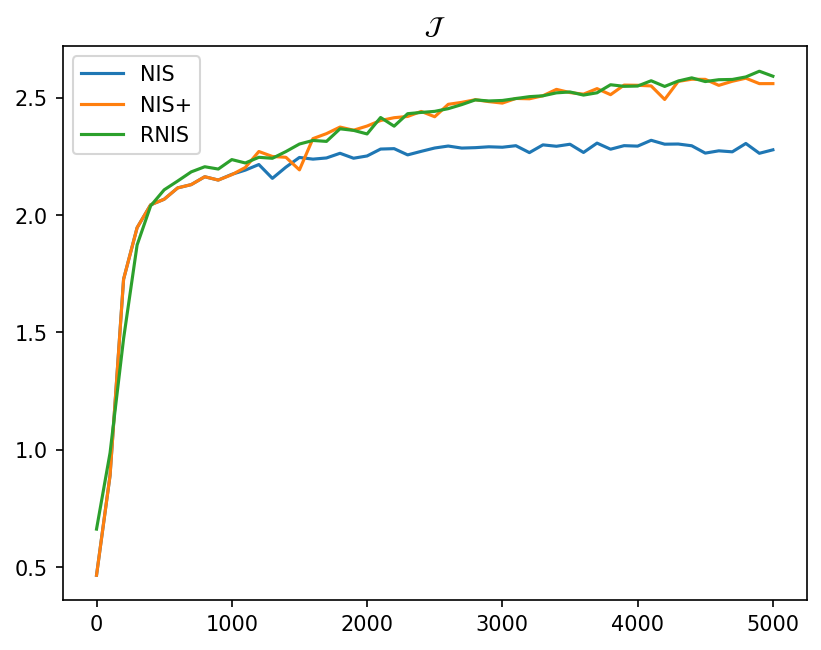

In [10]:
plt.figure(dpi=150)
timeseries = np.arange(len(trainer.eis)) * clip
plt.plot(timeseries, eis_nis, label='NIS')
plt.plot(timeseries, eis_nisp, label='NIS+')
plt.plot(timeseries, eis_rnis, label='RNIS')
plt.title(r'$\mathcal{J}$')
plt.legend()
plt.show()

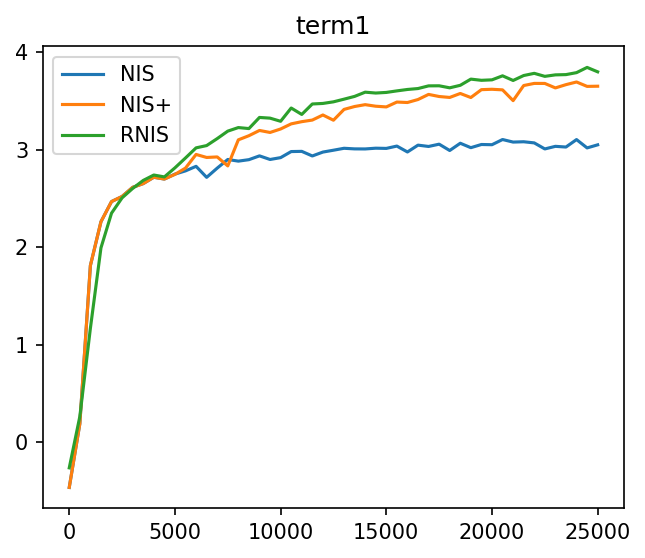

In [11]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis)) * clip
plt.plot(timeseries, term1s_nis, label='NIS')
plt.plot(timeseries, term1s_nisp, label='NIS+')
plt.plot(timeseries, term1s_rnis, label='RNIS')
plt.title(r'term1')
plt.legend()
# plt.yscale('log')
plt.show()

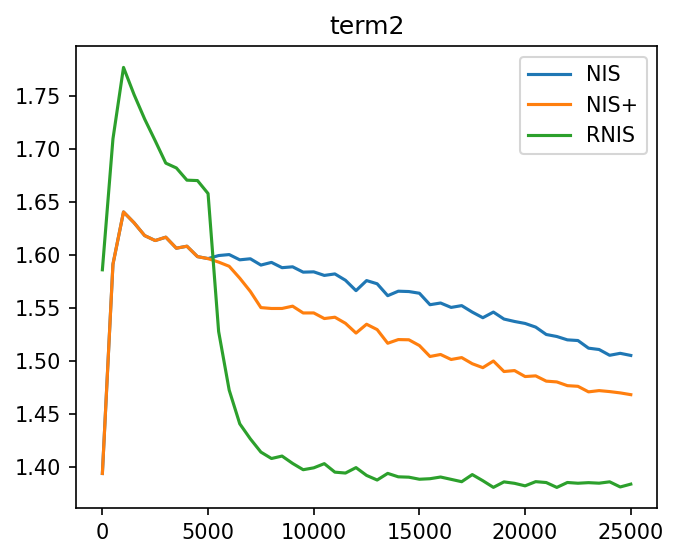

In [12]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis)) * clip
plt.plot(timeseries, term2s_nis, label='NIS')
plt.plot(timeseries, term2s_nisp, label='NIS+')
plt.plot(timeseries, term2s_rnis, label='RNIS')
plt.title(r'term2')
plt.legend()
# plt.yscale('log')
plt.show()

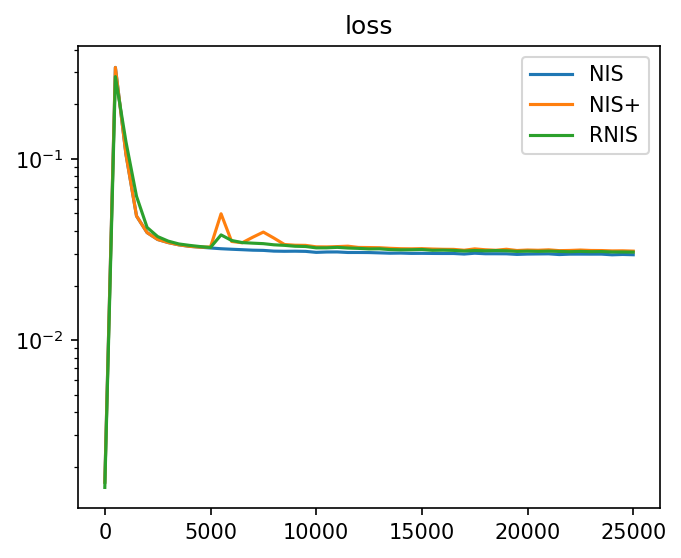

In [13]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis)) * clip
plt.plot(timeseries, losses_nis, label='NIS')
plt.plot(timeseries, losses_nisp, label='NIS+')
plt.plot(timeseries, losses_rnis, label='RNIS')
plt.title(r'loss')
plt.legend()
plt.yscale('log')
plt.show()

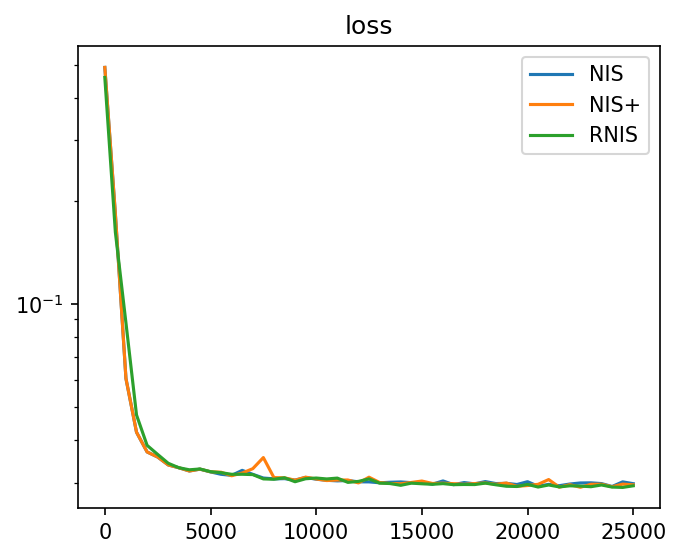

In [14]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis)) * clip
plt.plot(timeseries, MAEs_mstep_nis, label='NIS')
plt.plot(timeseries, MAEs_mstep_nisp, label='NIS+')
plt.plot(timeseries, MAEs_mstep_rnis, label='RNIS')
plt.title(r'loss')
plt.legend()
plt.yscale('log')
plt.show()